## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_rows = combined_df['Mouse ID'].count()
unique_mice = combined_df['Mouse ID'].nunique()
print (f"Total rows: {total_rows}")
print (f"Unique mice: {unique_mice}")

Total rows: 1893
Unique mice: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_df[combined_df.duplicated(subset = ['Mouse ID', 'Timepoint'], keep='first')]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep = 'first')
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.
total_clean_rows = clean_df['Mouse ID'].count()
cleaned_unique_mice = clean_df['Mouse ID'].nunique()
print (f"Total rows: {total_clean_rows}")
print (f"Unique mice: {cleaned_unique_mice}")

Total rows: 1888
Unique mice: 249


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

# Group clean_df by Drug Regimen
regimen_df = clean_df.groupby(['Drug Regimen'])

# Calculate summary statistics
tumors = regimen_df['Tumor Volume (mm3)']
average = tumors.mean()
median = tumors.median()
variance = tumors.var()
std_dev = tumors.std()
std_err = tumors.sem()

# Create summary dataframe 
stats_df = pd.DataFrame({"Average": average,
                        "Median": median,
                        "Variance": variance,
                        "Standard Deviation": std_dev,
                        "SEM": std_err})

stats_df

,Average,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

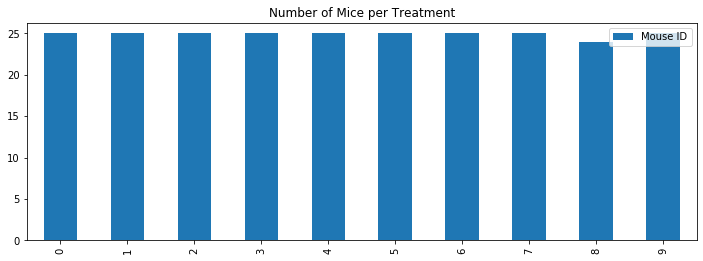

<Figure size 432x288 with 0 Axes>

In [7]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Calculate number of mice for each treatment 
mice_per_regimen = pd.DataFrame(regimen_df['Mouse ID'].nunique().reset_index())

# Use DataFrame.plot() in order to create a bar chart of the data
mice_per_regimen.plot(kind="bar", figsize=(12,4))

# Set a title for the chart
plt.title("Number of Mice per Treatment")

plt.show()
plt.tight_layout()

Text(0, 0.5, 'Number of Mice')

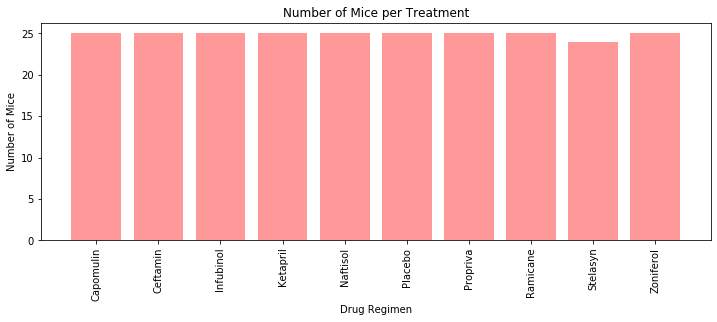

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(mice_per_regimen))
plt.figure(figsize=(12,4))
plt.bar(x_axis, mice_per_regimen['Mouse ID'], color='r', alpha=0.4, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mice_per_regimen['Drug Regimen'], rotation="vertical")

plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

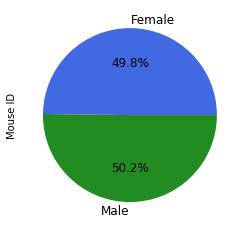

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Find distribution of mice by gender
gender_distrib = clean_df.groupby(['Sex']).nunique()

# Create pie plot using pandas
colors = ['royalblue', 'forestgreen']
gender_pie_pandas = gender_distrib.plot(kind="pie", y = "Mouse ID", autopct='%1.1f%%', legend = False, fontsize = 12, colors = colors)


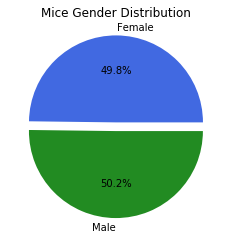

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#gender_distrib['Mouse ID'] = pd.to_numeric(gender_distrib['Mouse ID'],errors='coerce')

labels = gender_distrib.index
counts = gender_distrib['Mouse ID']
colors = ['royalblue', 'forestgreen']
explode = [0.1,0]

gender_pie_pyplot = plt.pie(counts, labels = labels, colors = colors, explode = explode, autopct="%1.1f%%")
pie_pyplot_title = plt.title("Mice Gender Distribution")

## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [12]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [16]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
